<a href="https://colab.research.google.com/github/hughjafro/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module3-gradient-descent/CTolbert_DS223_Gradient_Descent_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent Implementation Challenge!!

## Use gradient descent to find the optimal parameters of a **multiple** regression model. (We only showed an implementation for a bivariate model during lecture.)

A note: Implementing gradient descent in any context is not trivial, particularly the step where we calculate the gradient will change based on the number of parameters that we're trying to optimize for. You will need to research what the gradient of a multiple regression model looks like. This challenge is pretty open-ended but I hope it will be thrilling. Please work together, help each other, share resources and generally expand your understanding of gradient descent as you try and achieve this implementation. 

## Suggestions:

Start off with a model that has just two $X$ variables You can use any datasets that have at least two x variables. Potential candidates might be the blood pressure dataset that we used during lecture on Monday: [HERE](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls) or any of the housing datasets. You would just need to select from them the two varaibles $x$ variables and one y variable that you want to work with that you most want to work with. 

Use Sklearn to find the optimal parameters of your model first. (like we did during the lecture.) So that you can compare the parameter estimates of your gradient-descent linear regression to the estimates of OLS linear regression. If implemented correctly they should be nearly identical.

Becoming a Data Scientist is all about striking out into the unknown, getting stuck and then researching and fighting and learning until you get yourself unstuck. Work together! And fight to take your own learning-rate fueled step towards your own optimal understanding of gradient descent! 


In [0]:
##### Make it Hap'n Cap'n #####
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [0]:
# import pandas as pd

# df = pd.read_excel('https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls')
# df = df.rename(index=str, columns={"X1": "y", "X2": "age", "X3": "weight"})
# print(df.shape)
# df.head()

In [4]:
# Import data
df = pd.read_excel('https://github.com/hughjafro/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module3-gradient-descent/mlr02.xls?raw=true', index=0)

df = df.rename(index=str, columns={'X1': 'y', 'X2': 'age', 'X3': 'weight'})
print(df.shape)
df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'
(11, 3)


,y,age,weight
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196


##Calculate with sklearn first

In [5]:
# Calculate parameters using sklearn

# Create X matrix and y vector
y = df['y'].values
#X = df.loc[:,['age', 'weight']].values[:, np.newaxis]
X = df['age'].values[:, np.newaxis]

# Standardize the X
X = (X - X.mean()) /X.std()

# Matrix version
X_linalg = np.c_[np.ones(X.shape[0]), X]

print(X_linalg)

# Fit model
model = LinearRegression()
model.fit(X,y)

# Assign coefficient and intercept to varibales (beta_0, beta_1)
beta_1 = model.coef_[0]
beta_0 = model.intercept_

print('beta_1: ', beta_1)
print('beta_0: ', beta_0)

[[ 1.         -1.20301838]
 [ 1.         -0.39751912]
 [ 1.          0.52305147]
 [ 1.          1.21347941]
 [ 1.          0.1778375 ]
 [ 1.          1.32855074]
 [ 1.         -0.97287574]
 [ 1.         -0.16737647]
 [ 1.          0.29290882]
 [ 1.         -1.89344632]
 [ 1.          1.09840809]]
beta_1:  12.715856751330023
beta_0:  150.0909090909091


In [6]:
y

array([132, 143, 153, 162, 154, 168, 137, 149, 159, 128, 166])

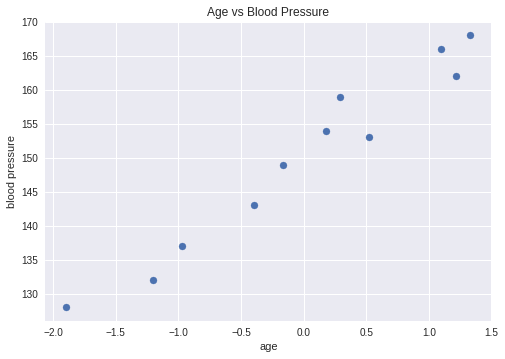

In [7]:
# Plot sklearn version
plt.scatter(X,y)
# plt.xlim(0,100)
# plt.ylim(100, 200)
plt.xlabel('age')
plt.ylabel('blood pressure')
plt.title('Age vs Blood Pressure')
plt.show();

## Calculate using Gradient Descent

In [14]:
# Choose a learning rate, alpha
alpha = .01
iterations = 2000
n = len(y)
np.random.seed(42)
theta = [0,0]

# Calculate predictions
prediction = np.dot(X_linalg, theta)
print('Prediction: \n', prediction, '\n')

# Calculate error
error = prediction - y
print('Error: \n', error, '\n')

# Calculate updated theta values
theta = theta - (alpha * (1/n) * np.dot(X.T, error))
print('Theta: \n', theta)


Prediction: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 

Error: 
 [-132. -143. -153. -162. -154. -168. -137. -149. -159. -128. -166.] 

Theta: 
 [0.12715857 0.12715857]


In [15]:
# Put it all together 
# Minimal gradient descent implementation

def gradient_descent(X, y, theta, iterations, alpha):
  for _ in range(iterations):
    prediction = np.dot(X, theta)
    error = prediction - y
    updates = (alpha * (1/n) * np.dot(X.T, error))
#     print(updates)
    theta = theta - updates
  return theta

final_theta = gradient_descent(X_linalg, y, theta, iterations, alpha)
print(final_theta)

[150.09090881  12.71585673]


###Multivariate

In [16]:
# Normalize dataset

df_norm = (df-df.mean()) / df.std()

print(df_norm.shape)
df_norm.head()

(11, 3)


,y,age,weight
0,-1.327593,-1.147033,-1.270594
1,-0.520363,-0.379020,-0.635297
2,0.213482,0.498710,-0.057754
3,0.873943,1.157007,0.924069
4,0.286867,0.169561,0.057754


In [22]:
# Create X matrix and y vector
y = df_norm['y'].values
X = df_norm.iloc[:,1:3]

# Matrix version
X_linalg = np.c_[np.ones(X.shape[0]), X]

#print(X_linalg)

# Fit model
model = LinearRegression()
model.fit(X,y)


# Assign coefficient and intercept to varibales (beta_0, beta_1)
beta_1 = model.coef_
beta_0 = model.intercept_

print('beta_1: ', beta_1)
print('beta_0: ', beta_0)

beta_1:  [0.57616409 0.4254835 ]
beta_0:  -2.949017333121613e-16


### Cost Function

In [0]:
# Cost Funtion

def

In [23]:
# Minimal gradient descent implementation
def gradient_descent(X, y, theta, iterations, alpha):
  for _ in range(iterations):
    prediction = np.dot(X,theta)
    error = prediction - y
    updates = (alpha * (1/n) * np.dot(X.T,error))
    theta = theta - updates
  return theta

gradient_descent(X_linalg, y, theta, iterations, alpha)


array([-2.78565050e-16,  5.76164087e-01,  4.25483502e-01])

## Stretch Goals

If you happen upon the most useful resources for accomplishing this challenge first, I want you to spend time today studying other variations of Gradient Descent-Based Optimizers.

- Try and write a function that can perform gradient descent for arbitarily large (in dimensionality) multiple regression models. 
- Create a notebook for yourself exploring these topics
- How do they differ from the "vanilla" gradient descent we explored today
- How do these different gradient descent-based optimizers seek to overcome the challenge of finding the global minimum among various local minima?
- Write a blog post that reteaches what you have learned about these other gradient descent-based optimizers.

[Overview of GD-based optimizers](http://ruder.io/optimizing-gradient-descent/)

[Siraj Raval - Evolution of Gradient Descent-Based Optimizers](https://youtu.be/nhqo0u1a6fw)